# Predicting Delays for US Flights

by David Schneemann

## Project Goal

My goal with this project is to identify key drivers of flight delays and to provide insight into why and how these factors influence flight delays. With this information and the following recommendations, we can have a better understanding of how to avoid booking flights that have delays. 

## Project Description

In the US, there are over 45,000 flights happening each and every day. At any given time, there are over 5000 flights in the sky at once. These vast quantities underline the importance of maintaining flights that have minimal issues and delays. However, delays do happen on a regular basis. The question is, can we predict when, where, and for how long those delays will be in the future?

In order to more accurately predict flight delays, we will analyze the attributes (features) of flights within a predetermined set of data. This dataset includes all US flights conducted during the year 2007. 
We will then develop models for predicting flight delays based on these attributes and provide recommendations and predictions for improving prediction of delays moving forward.

## Executive Summary

Summarayyyyy

-----------------------------------------------------------------------------------------------------------
## Initial Questions

#### 1. Do flights in August have higher average flight delays than other months? 

#### 2. Do flights on Thursdays have higher average flight delays than other days?

#### 3. Does JetBlue Airways have greater flight delays than other carriers' national average?

#### 4. Does Detroit airport have greater flight delays than all other airports' average delay?

#### 5. Does total_time_diff have a relationship to flight delay?

-----------------------------------------------------------------------------------------------------------
## Data Dictionary

In order to effectively meet our goals, the following module imports are required. \
Below is an extensive list of all modules I imported and used to create and complete the desired analysis for Zillow.

In [19]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt
from datetime import timedelta, datetime
import csv

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, RFE, f_regression, SequentialFeatureSelector
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from scipy import stats
import sklearn.preprocessing
from sklearn.metrics import mean_squared_error
from scipy.stats import stats, pearsonr, spearmanr, kruskal, levene

from env import user, password, host
import flight_delay_acquire
import flight_delay_prepare
import explore
import scale

|Index| Variable         | Variable descriptions                                                |
|---:|:------------------|:---------------------------------------------------------------------|
|  1 | Name              | Description                                                          |
|  2 | Year              | 2007                                                                 |
|  3 | Month             | Month of the year                                                    |
|  4 | dayofmonth        | 31-Jan                                                               |
|  5 | dayofweek         | 1 (Monday) - 7 (Sunday)                                              |
|  6 | depart            | Actual departure time (local, hhmm)                                  |
|  7 | scheduled_depart  | Scheduled departure time (local, hhmm)                               |
|  8 | arrive            | Actual arrival time (local, hhmm)                                    |
|  9 | scheduled_arrive  | Scheduled arrival time (local, hhmm)                                 |
| 10 | UniqueCarrier     | Unique carrier code                                                  |
| 11 | FlightNum         | Flight number                                                        |
| 12 | TailNum           | Plane tail number                                                    |
| 13 | total_time        | Total actual time from departure to arrival (in minutes)             |
| 14 | scheduled_total_time    | Total scheduled time from departure to arrival (in minutes)    |
| 15 | AirTime           | Total time in air (in minutes)                                                           |
| 16 | ArrDelay          | Arrival delay, in minutes                                            |
| 17 | DepDelay          | Departure delay, in minutes                                          |
| 18 | Origin            | Origin IATA airport code                                             |
| 19 | Dest              | Destination IATA airport code                                        |
| 20 | Distance          | in miles                                                             |
| 21 | TaxiIn            | Taxi in time, in minutes                                             |
| 22 | TaxiOut           | Taxi out time in minutes                                             |
| 23 | Cancelled         | Was the flight cancelled?                                            |
| 25 | Diverted          | 1 = yes, 0 = no                                                      |
| 26 | CarrierDelay      | in minutes                                                           |
| 27 | WeatherDelay      | in minutes                                                           |
| 28 | NASDelay          | National Aviation System (in minutes)                                |
| 29 | SecurityDelay     | in minutes                                                           |
| 30 | LateAircraftDelay | in minutes                                                           |
| 31 | total_delay       | Total Delay (Arrival + Departure delays)                             |
| 32 | total_time_diff   | Difference between actual total time and scheduled total time        |

## Acquire Flight Data

##### We acquire our data by utilizing my acquire.py file.
This file pulls my selected features from the 2007.csv. \
Our resulting dataset returns 7,453,215 entries of data with the following attributes.

In [2]:
# Calling my acquire.py file and utilizing its function,assigning the output to df
df = flight_delay_acquire.wrangle_flight_delay()

## Prepare Flight Data

##### We prepare our data by utilizing my prepare.py file.
This file:
- Handles null values
    - These null values represented roughly 2% of our data, so I chose to drop these rows
- Converts some variables to integers for optimization
- Handles outliers
- Cleans variables, including dropping `Diverted` and renaming columns
- Includes feature engineering for multiple variables
- Splits prepared df into train, validate, test, and associated dfs on x and y

Our resulting dataframes are ready for exploration and evaluation.

In [3]:
# Calling my prepare function and assigning the output to the following variables
df, train, validate, test, x_train, y_train, x_validate, y_validate, x_test, y_test = flight_delay_prepare.prep_flight_delay(df)

In [4]:
# Checking shape on our samples to confirm appropriate split
print('Total df shape: {}.'.format(df.shape))
print('Train shape: {}.'.format(train.shape))
print('Validate shape: {}.'.format(validate.shape))
print('Test shape: {}.'.format(test.shape))

Total df shape: (7275288, 57).
Train shape: (4074161, 57).
Validate shape: (1746069, 57).
Test shape: (1455058, 57).


## Set the Data Context

#### Note: Not all visuals, analysis, and work is shown within this Final Report. 
#### All my work, from start to finish, is available in my `working_notebook.ipynb` file for your reference.

Our acquired and prepared dataset contains information for 7,453,215 flights throughout 2007. \
    In the process of exploring this data and setting initial hypotheses, I created a figure plotting choice categorical and continuous variables with our target variable of `total_delay`. Using this figure I determined potential relationships with each of the features stated in my initial hypotheses. The following exploration seeks to answer these questions.

-----------------------------------------------------------------------------------------------------------
## Exploratory Analysis
I now take each of my initial hypotheses in turn, answering them using visualizations and statistical analysis. \
I utilize an `explore.py` file in order to abstract repetitive code away from this Final Report. 

### 1. Do flights in August have higher average flight delays than other months? 

- Ho = December flights avg total_delay <= average annual total_delay
- Ha = December flights avg total_delay > average annual total_delay

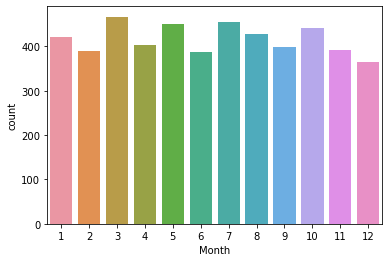

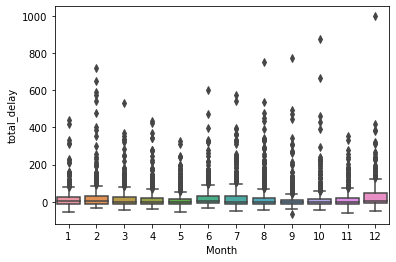

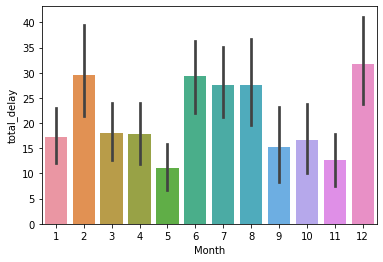

In [5]:
# Calling explore.py; applying plot function to 'Month' and 'total_delay'
explore.plot_categorical_and_continuous_vars(train, 'Month', 'total_delay')

#### Statistical Analysis

In [6]:
from scipy.stats import levene

alpha = 0.05
# Performing Levene's Test to determine whether variance is equal or not
December = train[train['Month'] == 12].total_delay
overall_mean = train.total_delay

stat,p = levene(December, overall_mean, center= 'mean')

print(f'statistic by levenes test: {stat}, p-value: {p}, alpha: {alpha}')

if p > alpha:
    print("We fail to reject Ho")
else:
    print("We reject Ho")

statistic by levenes test: 5893.890833992634, p-value: 0.0, alpha: 0.05
We reject Ho


In [7]:
# Use the scipy stats function one-sample t-test to calculate p-value
August = train[train['Month'] == 8].total_delay
alpha = 0.05

delay_sample = August
overall_mean = train[train['Month'] != 8].groupby(by=['Month']).total_delay.mean().mean()


t, p = stats.ttest_1samp(delay_sample, overall_mean)

print(f't-statistic by one-sample t-test: {t}, p-value: {p}, alpha: {alpha}')

if p/2 > alpha:
    print("We fail to reject Ho")
elif t < 0:
    print("We fail to reject Ho")
else:
    print("We reject Ho")


t-statistic by one-sample t-test: 36.23898056899004, p-value: 4.9499434899979726e-287, alpha: 0.05
We reject Ho


#### Answer 1 : Yes, from our visualizations and statistical analysis, we can express confidence that August flights have higher average flight delays than other months' average delay.
Following our statistical test, we indicate that this feature appears to show a strong relationship with total_delay, meaning that there is statistical significance behind the claim that average delay in August relates to total_delay. Thus we move forward with this feature.

-----------------------------------------------------------------------------------------------------------
### 2. Do flights on Thursday have higher average flight delays than other days?
- Ho = Thursday flights avg total_delay <= average annual total_delay
- Ha = Thursday flights avg total_delay > average annual total_delay

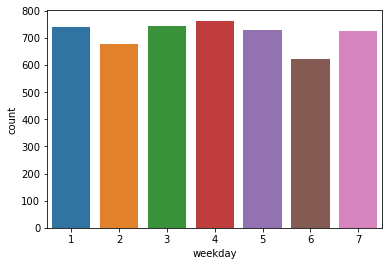

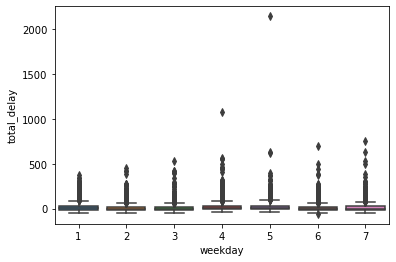

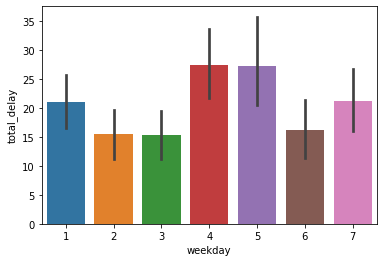

In [8]:
# Calling explore.py; applying plot function to 'bathrooms' and 'home_value'
explore.plot_categorical_and_continuous_vars(train, 'weekday', 'total_delay')

In [9]:
# Performing Levene's Test to determine whether variance is equal or not
Thursday = train[train['weekday'] == 4].total_delay
overall_mean = train.total_delay

stat,p = levene(December, overall_mean, center= 'mean')

print(f'statistic by levenes test: {stat}, p-value: {p}, alpha: {alpha}')

if p > alpha:
    print("We fail to reject Ho")
else:
    print("We reject Ho")

statistic by levenes test: 5893.890833992634, p-value: 0.0, alpha: 0.05
We reject Ho


In [10]:
# Use the scipy stats function one-sample t-test to calculate p-value
Thursday = train[train.weekday == 4].total_delay
alpha = 0.05


delay_sample = Thursday
overall_mean = train[train['weekday'] != 4].groupby(by=['weekday']).total_delay.mean().mean()

t, p = stats.ttest_1samp(delay_sample, overall_mean)

print(f't-statistic by one-sample t-test: {t}, p-value: {p}, alpha: {alpha}')

if p/2 > alpha:
    print("We fail to reject Ho")
elif t < 0:
    print("We fail to reject Ho")
else:
    print("We reject Ho")

t-statistic by one-sample t-test: 47.28395107366056, p-value: 0.0, alpha: 0.05
We reject Ho


#### Answer 2: Yes, from our visualizations and statistical analysis, we can express confidence that Thursday flights have higher average flight delays than other weekdays' average delay.
Following our statistical test, we indicate that this feature appears to show a strong relationship with total_delay, meaning that there is statistical significance behind the claim that average delay on Thursdays relates to total_delay. Thus we move forward with this feature.

-----------------------------------------------------------------------------------------------------------
### 3. Does JetBlue Airways have greater flight delays than other carriers' national average?

- Ho = JetBlue Airways flights avg total_delay <= average carrier total_delay
- Ha = JetBlue Airways flights avg total_delay > average carrier total_delay

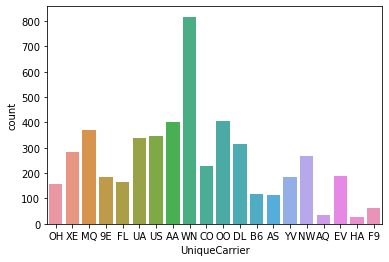

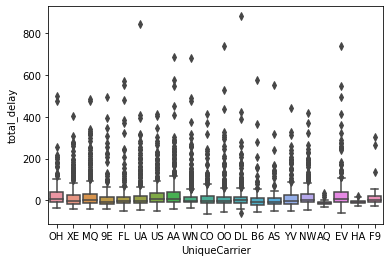

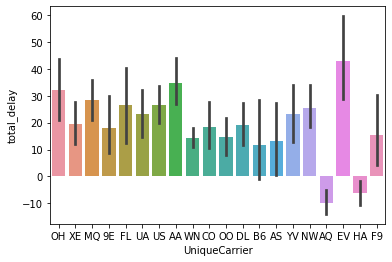

In [11]:
# Calling explore.py; applying plot function to 'garage_spaces' and 'home_value'
explore.plot_categorical_and_continuous_vars(train, 'UniqueCarrier', 'total_delay')

In [12]:
# Performing Levene's Test to determine whether variance is equal or not
JetBlue = train[train['UniqueCarrier'] == 'B6'].total_delay
overall_mean = train.total_delay

stat,p = levene(JetBlue, overall_mean, center= 'mean')

print(f'statistic by levenes test: {stat}, p-value: {p}, alpha: {alpha}')

if p > alpha:
    print("We fail to reject Ho")
else:
    print("We reject Ho")

statistic by levenes test: 5067.159804328879, p-value: 0.0, alpha: 0.05
We reject Ho


In [13]:
# Use the scipy stats function one-sample t-test to calculate p-value
JetBlue = train[train.UniqueCarrier == 'B6'].total_delay
alpha = 0.05

delay_sample = JetBlue
overall_mean = train[train['UniqueCarrier'] != 'B6'].groupby(by=['UniqueCarrier']).total_delay.mean().mean()

t, p = stats.ttest_1samp(delay_sample, overall_mean)

print(f't-statistic by one-sample t-test: {t}, p-value: {p}, alpha: {alpha}')

if p > alpha:
    print("We fail to reject Ho")
elif t < 0:
    print("We fail to reject Ho")
else:
    print("We reject Ho")

t-statistic by one-sample t-test: 30.343452797021186, p-value: 2.2875912358663617e-201, alpha: 0.05
We reject Ho


#### Answer 3: Yes, from our visualizations and statistical analysis, we can express confidence that JetBlue Airways flights have higher average flight delays than other airlines' average delay.
Following our statistical test, we indicate that this feature appears to show a strong relationship with total_delay, meaning that there is statistical significance behind the claim that average delay JetBlue flights relates to total_delay. Thus we move forward with this feature.

-----------------------------------------------------------------------------------------------------------
### 4. Does Detroit airport have greater flight delays than all other airports' average delay?
- Ho = Flights out of Detroit airport avg total_delay <= all other airports' average total_delay
- Ha = Flights out of Detroit airport avg total_delay > all other airports' average total_delay

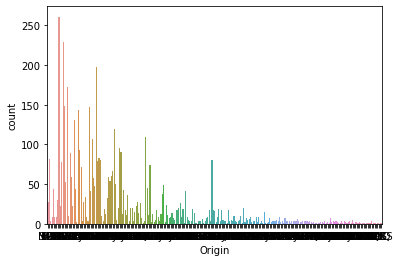

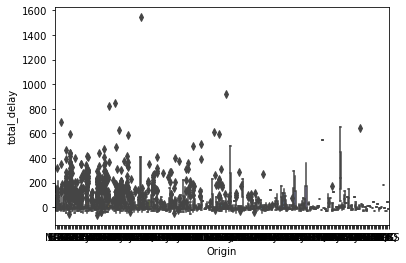

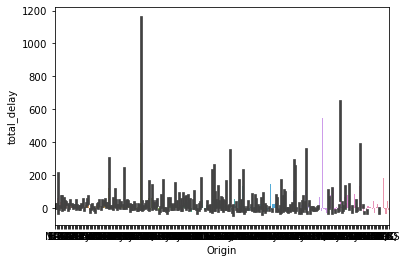

In [14]:
# Calling explore.py; applying plot function to 'location' and 'home_value'
explore.plot_categorical_and_continuous_vars(train, 'Origin', 'total_delay')

In [15]:
# Performing Levene's Test to determine whether variance is equal or not
Detroit = train[train.Origin == 'DTW'].total_delay
overall_mean = train.total_delay

stat,p = levene(Detroit, overall_mean, center= 'mean')

print(f'statistic by levenes test: {stat}, p-value: {p}, alpha: {alpha}')

if p > alpha:
    print("We fail to reject Ho")
else:
    print("We reject Ho")

statistic by levenes test: 214.11242774200724, p-value: 1.745402371147923e-48, alpha: 0.05
We reject Ho


In [16]:
# Use the scipy stats function one-sample t-test to calculate p-value
Detroit = train[train.Origin == 'DTW'].total_delay
alpha = 0.05

delay_sample = Detroit
overall_mean = train[train['Origin'] != 'DTW'].groupby(by=['Origin']).total_delay.mean().mean()

t, p = stats.ttest_1samp(delay_sample, overall_mean)

print(f't-statistic by one-sample t-test: {t}, p-value: {p}, alpha: {alpha}')

if p/2 > alpha:
    print("We fail to reject Ho")
elif t < 0:
    print("We fail to reject Ho")
else:
    print("We reject Ho")

t-statistic by one-sample t-test: 17.10281599688487, p-value: 1.7673598340865783e-65, alpha: 0.05
We reject Ho


#### Answer 4: Yes, from our visualizations and statistical analysis, we can express confidence that Detroit flights have higher average flight delays than all other airports' average delay.
Following our statistical test, we indicate that this feature appears to show a strong relationship with total_delay, meaning that there is statistical significance behind the claim that average delay at Detroit airport relates to total_delay. Thus we move forward with this feature.

-----------------------------------------------------------------------------------------------------------
### 5. Does total_time_diff have a relationship to flight delay?
- Ho = More total_time_diff translates to <= total_delay 
- Ha = More total_time_diff translates to > total_delay

<Figure size 432x288 with 0 Axes>

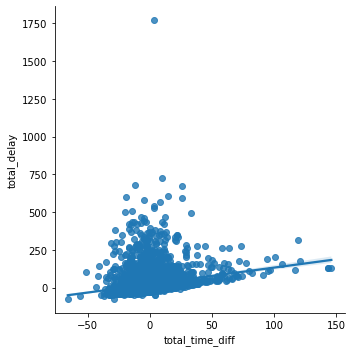

<Figure size 432x288 with 0 Axes>

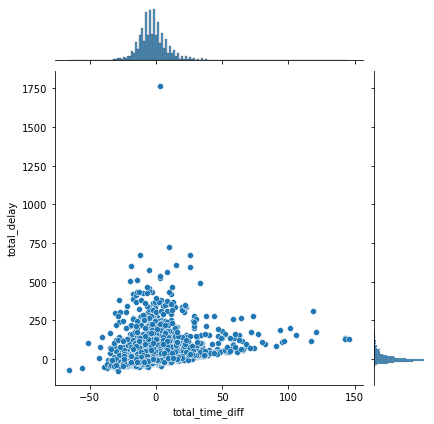

In [17]:
# Calling explore.py; applying two continuous vars plot function to 'sq_ft' and 'home_value'
explore.plot_continuous_and_continuous_vars(train, 'total_time_diff', 'total_delay')

In [18]:
# Use the scipy stats function pearsonr to calculate the correlation coefficient and the p-value.

r_sf, p_sf = pearsonr(train['total_time_diff'], train['total_delay'])

r_sf, p_sf

print(f'Correlation Coefficient by Pearson Test: {r_sf}, p-value: {p_sf}')

# set alpha : 0.05
if p_sf < 0.05:
    print('We can reject the null hypothesis')
else:
    print('we cannot reject the null hypothesis')

Correlation Coefficient by Pearson Test: 0.23141340329024448, p-value: 0.0
We can reject the null hypothesis


#### Answer 5: Yes, Difference between actual total time and scheduled total time correlates with an increase in total_delay
Following our statistical test, we reject the null, meaning that there is statistical significance behind the claim that the population means of the total_delay are NOT equal. Thus we move forward with this feature.

-----------------------------------------------------------------------------------------------------------
## Exploration Summary: Which are the best predictors of home value?

#### Key Takeaways
##### All 5 features I explored have been shown to have a potentiaal relationship or correlation with total_delay, thus I'll move forward with these features to modeling:
- `Month` 
- `weekday` 
- `UniqueCarrier` 
- `Origin`
- `total_time_diff` 

##### In an attempt to produce the most accurate models possible, I will drop the following troublesome or extraneous features:
- `Year`
- `ArrDelay`
- `DepDelay`
- `CarrierDelay`
- `WeatherDelay`
- `NASDelay`
- `SecurityDelay`
- `LateAircraftDelay`
- `FlightNum`
- `TailNum`
- `Cancelled`
- `Diverted`
- `Dest`


#### Additional Takeaways

##### 1. Carrier Delays appear to be most prominent and the longest on average of all delays

##### 2. Certain Carriers have more Carrier Delays than others; Carriers with highest delays:
    - JetBlue Airways
    - American Airlines (may be due to number of flights comparatively)
    - Envoy Air

##### 3. It appears airlines regularly include extra scheduled flight time
    - Even with small delays, pilots are usually able to make up time in the air, thus:
        - Departure Delays seem to be greater than Arrival Delays on average
        - Even if departure delays occur, on average, flights are able to diminish this delay by reducing flight time

##### 4. The difference in actual total time of a flight and total scheduled time has a negative correlation with weekends and Mondays. Could be indicator of a cultural/human phenomenon where people move faster because they want to finish the job and get home.

##### 5. Despite Southwest conducting the most flights of any carrier, I can be confident in stating that they are able to maintain an average flight delay as good or better than the national carrier average

-----------------------------------------------------------------------------------------------------------
## Predicting Total Flight Delay
In fitting and evaluating models on our data, the metric we choose to use to evaluate is root mean square error (RMSE). This allows us to compare the mean error of a model in the actual units of our target variable, `total_delay` (in minutes). Thus, this is the most valuable metric for understanding the performance of our models.

### Scaling
I have chosen a MinMax Scaler upon which to scale my data. After comparing this and other scalers, I determined MinMax to provide the best results. I call my `model.py` scaling function and assign respective variables below.

In [19]:
# Calling our model.py; Assigning df variables to our called function, `scale_data`
train_scaled, validate_scaled, test_scaled = scale.scale_data(train, validate, test)

NameError: name 'model' is not defined

#### Now that we have our data scaled, I will:
- Remove extraneous features not already removed
- Split our scaled train, validate, and test on x and y

In [ ]:
# Dropping Month, UniqueCarrier, and weekday due to previous encoding of these variables
df = df.drop(columns='Month', axis =1)
df = df.drop(columns='UniqueCarrier', axis =1)
df = df.drop(columns='weekday', axis =1)

In [ ]:
# Splitting train, validate, and test dfs on x and y FOR SCALED DF
x_train_scaled = train_scaled.drop(columns=['home_value'])
x_validate_scaled = validate_scaled.drop(columns=['home_value'])
x_test_scaled = test_scaled.drop(columns=['home_value'])

y_train_scaled = train_scaled['home_value']
y_validate_scaled = validate_scaled['home_value']
y_test_scaled = test_scaled['home_value']

#### Baseline
In order to compare our models, I'll create a baseline from our train dataset actual home values

In [ ]:
#Establish baselines for the train and validation datasets
baseline = train['home_value'].mean()

# Create new columns for baseline
train['baseline'] = baseline
validate['baseline'] = baseline
test['baseline'] = baseline

# Find RMSE for each sample
train_rmse = sqrt(mean_squared_error(train['home_value'], train.baseline))
validate_rmse = sqrt(mean_squared_error(validate['home_value'], validate.baseline))
test_rmse = sqrt(mean_squared_error(test['home_value'], test.baseline))

print('Train baseline RMSE: {}.'.format(train_rmse))
print('Validation baseline RMSE: {}.'.format(validate_rmse))
print('Test baseline RMSE: {}.'.format(test_rmse))

Train baseline RMSE: 272118.84506691294.
Validation baseline RMSE: 268096.9138598306.
Test baseline RMSE: 270460.22757535306.


I'll now create:
- `train_predictions` df for our train predictions 
- `predictions` df for our validate predictions

In [ ]:
# Creating dfs for train and validate predictions
train_predictions = pd.DataFrame({
    'actual': train['home_value'],
    'baseline': baseline
}) 

predictions = pd.DataFrame({
    'actual': validate['home_value'],
    'baseline': baseline
}) 

### Fit 3 Best Models
- Linear Regression (`simple_lm`)
- Lasso-Lars Regression (`lasso_lars`)
- TweediRegressor (`glm`)

#### Fitting Linear Regression

In [ ]:
# Create an instance of the model and fit it to my data
lm = LinearRegression().fit(x_train_scaled, y_train_scaled)

# Predicting on train and validate and adding column to both predictions dfs 
train_predictions['simple_lm'] = lm.predict(x_train_scaled)
predictions['simple_lm'] = lm.predict(x_validate_scaled)

#### Fitting Lasso-Lars Regression

In [ ]:
# Create the model object
lars = LassoLars(alpha=1)

# Fit the model to our training data
lars.fit(x_train_scaled, y_train_scaled)

# predict train
train_predictions['lasso_lars'] = lars.predict(x_train_scaled)

# Predict validate
predictions['lasso_lars'] = lars.predict(x_validate_scaled)

#### Fitting TweediRegressor

In [ ]:
# Create the model object
glm = TweedieRegressor(power=0, alpha=1)

# Fit the model to our training data
glm.fit(x_train_scaled, y_train_scaled)

# predict train, add to df
train_predictions['glm'] = glm.predict(x_train_scaled)

# Predict validate, add to df
predictions['glm'] = glm.predict(x_validate_scaled)

#### Evaluating Models using root mean squared error (RMSE)

In [ ]:
# Calculate root mean squared error (RMSE) for every column in the train_predictions df
def calculate_rmse(y_predicted):
    return sqrt(mean_squared_error(train_predictions.actual, y_predicted))

print('Train baseline RMSE: {}.'.format(train_rmse))
train_predictions.apply(calculate_rmse).sort_values()

Train baseline RMSE: 272118.84506691294.


actual             0.000000
simple_lm     221910.865863
lasso_lars    221921.119966
glm           259201.362112
baseline      272118.845067
dtype: float64

In [ ]:
# Calculate root mean squared error (RMSE) for every column in the predictions df
def calculate_rmse(y_predicted):
    return sqrt(mean_squared_error(predictions.actual, y_predicted))

print('Validation baseline RMSE: {}.'.format(validate_rmse))
predictions.apply(calculate_rmse).sort_values()

Validation baseline RMSE: 268096.9138598306.


actual             0.000000
simple_lm     217319.455730
lasso_lars    217338.051334
glm           255170.615728
baseline      268096.913860
dtype: float64

##### Model Conclusion: 
Based on comparing our train and validate predictions, we can say with confidence that Linear Regression (`simple_lm`) is our best performing model. We will now predict and evaluate this model on our test dataset

### Predict and Evaluate Test dataset
Like with train and validate, I'll create a predictions df to collect predictions and then evaluate.

In [ ]:
test_predictions = pd.DataFrame({
    'actual': test['home_value'],
    'baseline': baseline
}) 

In [ ]:
#Create an instance of the model and fit it to my data
lm = LinearRegression().fit(x_train_scaled, y_train_scaled)

# Predict on test
test_predictions['simple_lm'] = lm.predict(x_test_scaled)

test_predictions.head()

,actual,baseline,simple_lm
21816,79477,377672.367962,399792.291476
29518,611458,377672.367962,611638.158403
49732,324879,377672.367962,215360.414827
41274,59652,377672.367962,278717.963066
47604,215371,377672.367962,395783.936060


In [ ]:
# Calculate root mean squared error (RMSE) for the test_predictions df
def calculate_rmse(y_predicted):
    return sqrt(mean_squared_error(test_predictions.actual, y_predicted))

print('Test baseline RMSE: {}.'.format(test_rmse))
test_predictions.apply(calculate_rmse).sort_values()

Test baseline RMSE: 270460.22757535306.


actual            0.000000
simple_lm    222613.258374
baseline     270460.227575
dtype: float64

In [ ]:
test_result = test_predictions.apply(calculate_rmse).sort_values()

In [ ]:
# Finding by how much my model beat baseline 
model_percent = abs((test_result['simple_lm'] - test_rmse) / ((test_result['simple_lm'] + test_rmse) / 2))

print("The model beat baseline by: "+"{:.2%}".format(model_percent))

The model beat baseline by: 19.41%


**Success!** \
From this calculation on our test dataset, we can observe that my Linear Regression model successfully beat our baseline.

**Our model performs 19.5% better than baseline**

-----------------------------------------------------------------------------------------------------------
## Conclusion

### Summary

In seeking solutions to more accurately predict home value for Zillow, we have explored a multiplicity of factors in the dataset that affect home value. We have shown that some potential primary drivers of home value are :

- The number of bedrooms in a home
- The number of bathrooms in a home 
- The number of garage spaces in a home
- The location of a home by county
- The square footage of a home

The correlation of these features with home value, combined within our analysis and models, expresses confidence in the validity of our findings. We have created robust models that perform significantly better than our baseline estimated error of 270,460.

Having fit the best performing model to our train, validate, and test datasets, we expect this model to perform 19.5% better than our baseline in the future on data it has not seen, given no major changes to our data source.

### Recommendations

There are a number of recommendations that can be offered based on the above analysis. These suggestions are tied to the findings within our primary drivers of home value:

1. Based on our exploration of bedroom and bathroom counts, collecting additional data on how many rooms are in a home, including more specific data on living spaces versus kitchens and other spaces
2. Kitchen data, namely which major appliances and amenities are available in a given home. (ie. dishwasher, kitchen island, etc.)
3. In collecting more nuanced data about a home, I suggest we send out email surveys prompting home owners with limited data on their home in the Zillow database to provide additional details about their residence.

### Next Steps

Despite the overall effectiveness of our best-performing model, there is always room for improvement and optimization. \
If given more time to pursue a better results, I would begin by conducting further exploration and analysis of other features within our dataset. These features could include:
- Whether a home has a pool
- The square footage of the property, not just the home

In addition to exploring other features, I would look into methods for more appropriately separating our data into additional housing categories. For example:
- Calculating a ratio of home square footage against square footage of the entire property. This home to property ratio could be valuable.
- Narrowing a home's location to pinpoint the city and specific neighborhood a home is in. 

By optimizing our dataset to include the above categories, I believe we could increase the correlation of our feature set with home value and improve model prediction accuracy.